# 配置环境

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


# 差分隐私处理

## Step 1 import packages

In [2]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

## Step 2 user-defined parameteres

In [3]:
# input dataset
file_name = "artificial-data2"
input_data = "./data/" + file_name + ".csv"
# location of two output files
mode = 'correlated_attribute_mode'
description_file = f"./out/{mode}/" + file_name + "_synthetic_description.json"
synthetic_data = f"./out/{mode}/" + file_name + "_synthetic_data.csv"

input_data, description_file, synthetic_data

('./data/artificial-data2.csv',
 './out/correlated_attribute_mode/artificial-data2_synthetic_description.json',
 './out/correlated_attribute_mode/artificial-data2_synthetic_data.csv')

In [4]:
input_df = pd.read_csv(input_data)
input_df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,302.163471,30.668476,221.750150,460.726524,148.858776,99.243741,298.923559,397.679591,230.430446,351.044142
1,619.475102,101.907068,137.509907,359.296367,148.384387,99.342308,346.061881,353.666978,274.816608,395.334309
2,347.248601,63.548142,184.928565,414.078528,58.184411,109.015097,305.098980,435.862073,247.587425,395.306070
3,147.144639,74.232423,211.467983,352.077569,54.150746,96.767975,328.709824,387.696055,302.710738,361.149559
4,555.690734,75.707704,159.716232,326.301107,148.872239,136.341415,256.282571,344.575222,231.534942,336.494420


In [5]:
input_df.shape

(401, 10)

In [6]:
# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 10

# specify categorical attributes
# categorical_attributes = {'education': True}
categorical_attributes = {}

# specify which attributes are candidate keys of input dataset.
# candidate_keys = {'ssn': True}
candidate_keys = {}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 100

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = input_df.shape[0] # Here input_df.shape[0] is the same as input dataset, but it can be set to another number.

## Step 3 DataDescriber

1. Instantiate a DataDescriber.
2. Compute the statistics of the dataset.
3. Save dataset description to a file on local machine.

In [7]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT a7
Adding attribute a9
Adding attribute a4
Adding attribute a10
Adding attribute a1
Adding attribute a2
Adding attribute a6
Adding attribute a5
Adding attribute a8
Adding attribute a3
========================== BN constructed ==========================


In [8]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    a9  has parents ['a7'].
    a4  has parents ['a9', 'a7'].
    a10 has parents ['a4', 'a7'].
    a1  has parents ['a4', 'a7'].
    a2  has parents ['a1', 'a4'].
    a6  has parents ['a1', 'a7'].
    a5  has parents ['a1', 'a7'].
    a8  has parents ['a1', 'a9'].
    a3  has parents ['a1', 'a10'].


## Step 4 generate synthetic dataset

1. Instantiate a DataGenerator.
2. Generate a synthetic dataset.
3. Save it to local machine.

In [9]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

## Step 5 compare the statistics of input and sythetic data (optional)

The synthetic data is already saved in a file by step 4. The ModelInspector is for a quick test on the similarity between input and synthetic datasets.

### 5.1 instantiate a ModelInspector.

It needs input dataset, synthetic dataset, and attribute description.

In [10]:
input_df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,302.163471,30.668476,221.750150,460.726524,148.858776,99.243741,298.923559,397.679591,230.430446,351.044142
1,619.475102,101.907068,137.509907,359.296367,148.384387,99.342308,346.061881,353.666978,274.816608,395.334309
2,347.248601,63.548142,184.928565,414.078528,58.184411,109.015097,305.098980,435.862073,247.587425,395.306070
3,147.144639,74.232423,211.467983,352.077569,54.150746,96.767975,328.709824,387.696055,302.710738,361.149559
4,555.690734,75.707704,159.716232,326.301107,148.872239,136.341415,256.282571,344.575222,231.534942,336.494420


In [11]:
synthetic_df = pd.read_csv(synthetic_data)
synthetic_df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,599.891781,53.536810,235.762063,367.120944,213.743053,75.315122,348.825770,54.156483,213.261605,405.732899
1,414.933357,360.007245,163.451952,142.509472,491.016298,376.896023,446.685347,118.076749,127.578431,234.111521
2,220.850936,445.970712,410.842631,313.868689,130.355746,71.468641,373.756820,215.290168,665.752743,194.751017
3,360.424084,184.569975,341.324839,264.925980,179.838533,477.183653,354.687011,156.173549,304.147938,321.192462
4,660.503292,204.768566,38.303500,194.558261,153.173439,31.983501,282.533896,148.665864,603.080735,419.792887


In [12]:
synthetic_df.columns

Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10'], dtype='object')

In [13]:
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

### 5.2 compare histograms between input and synthetic datasets.

a1
a2
a3
a4
a5
a6
a7
a8
a9
a10


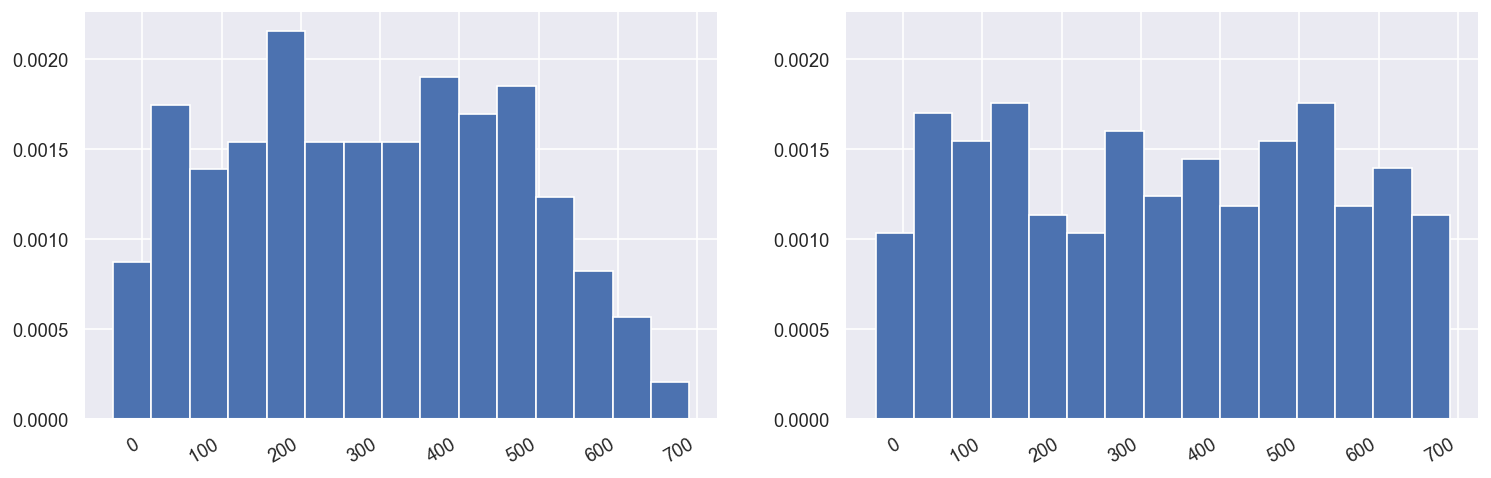

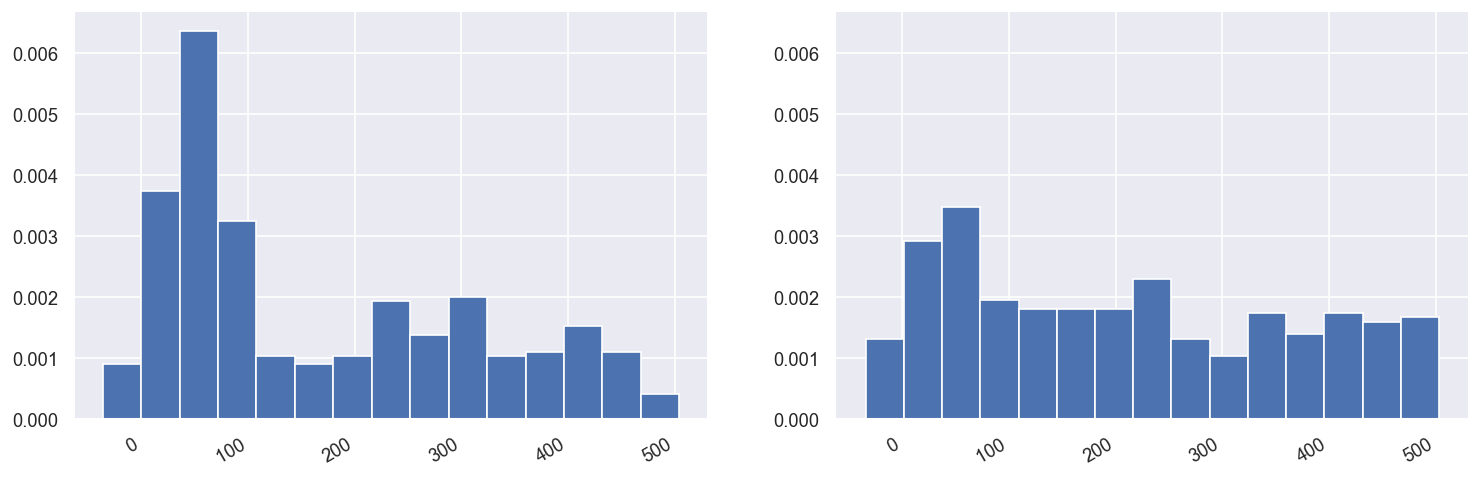

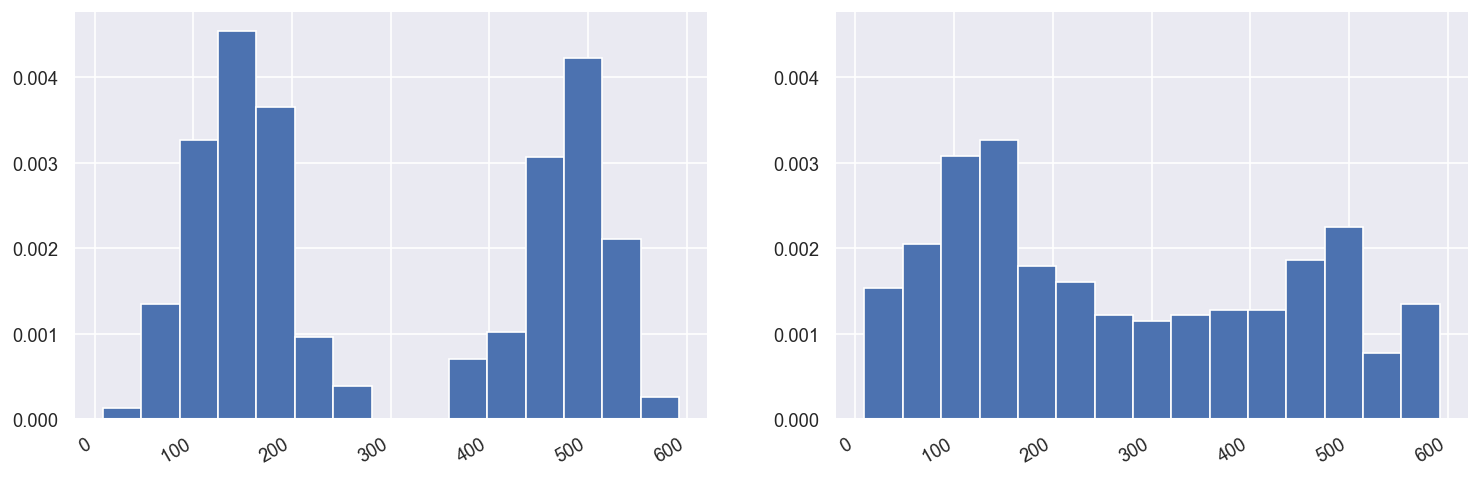

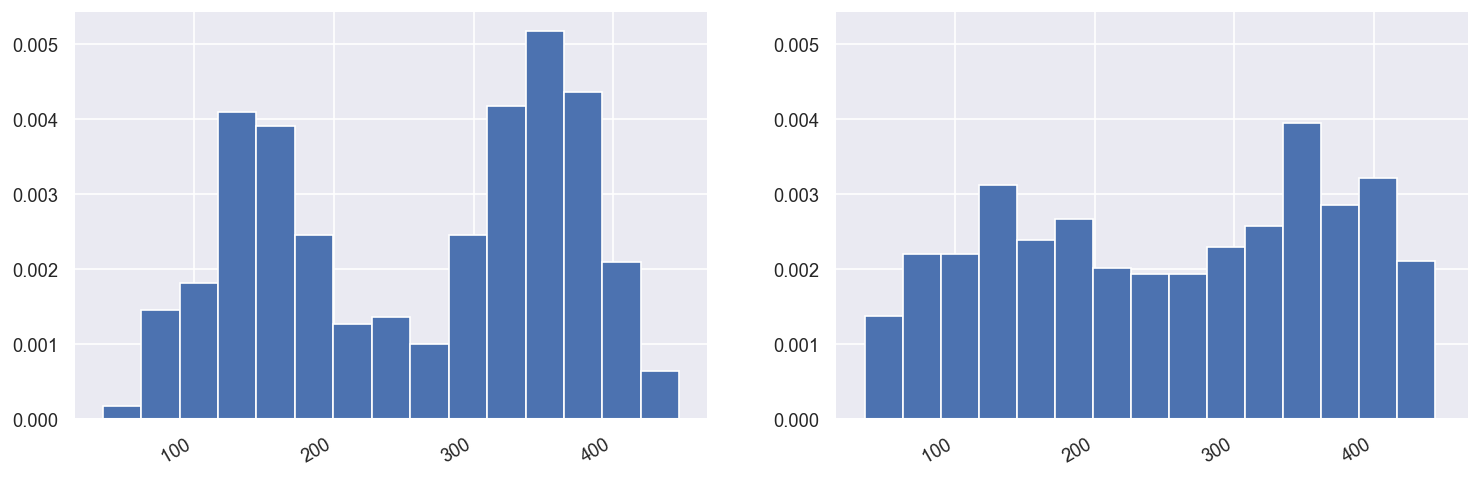

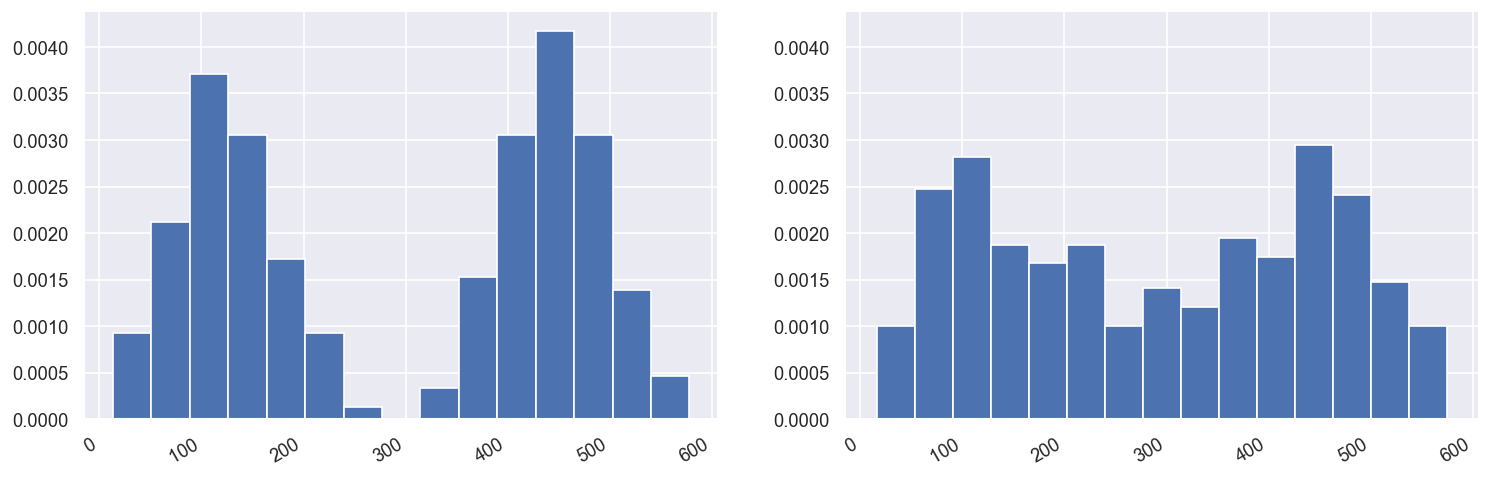

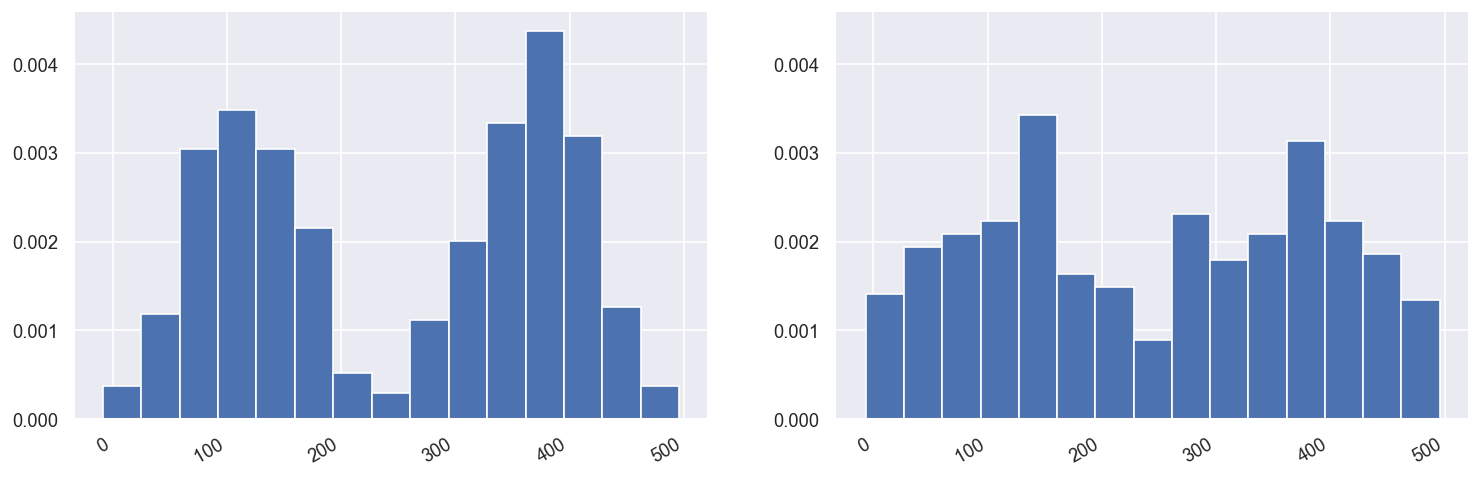

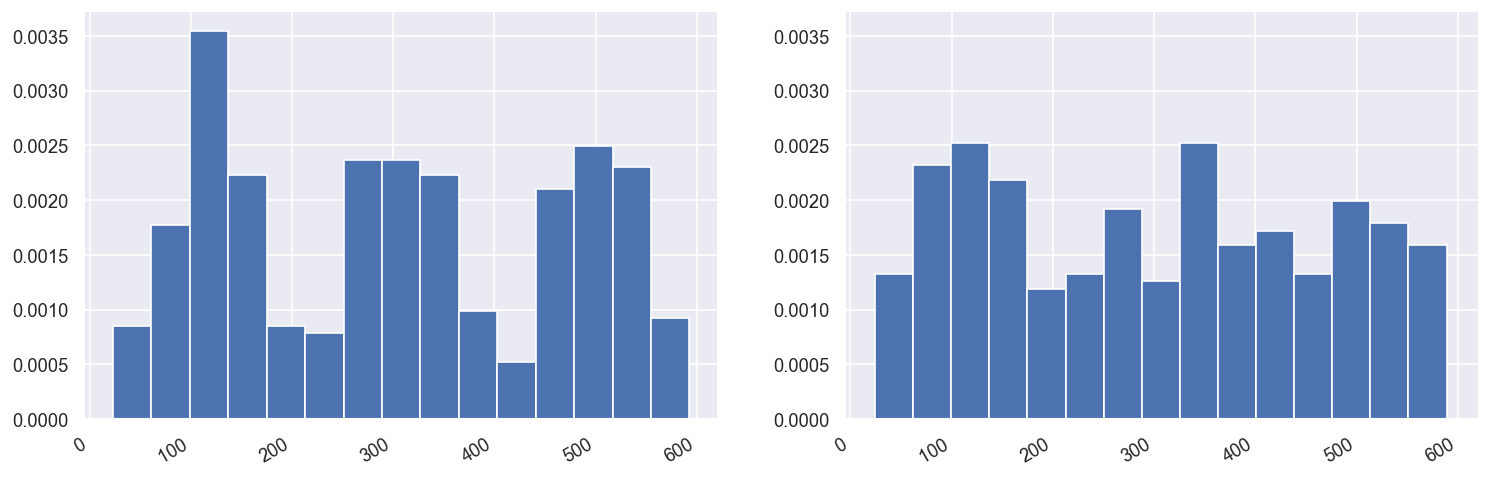

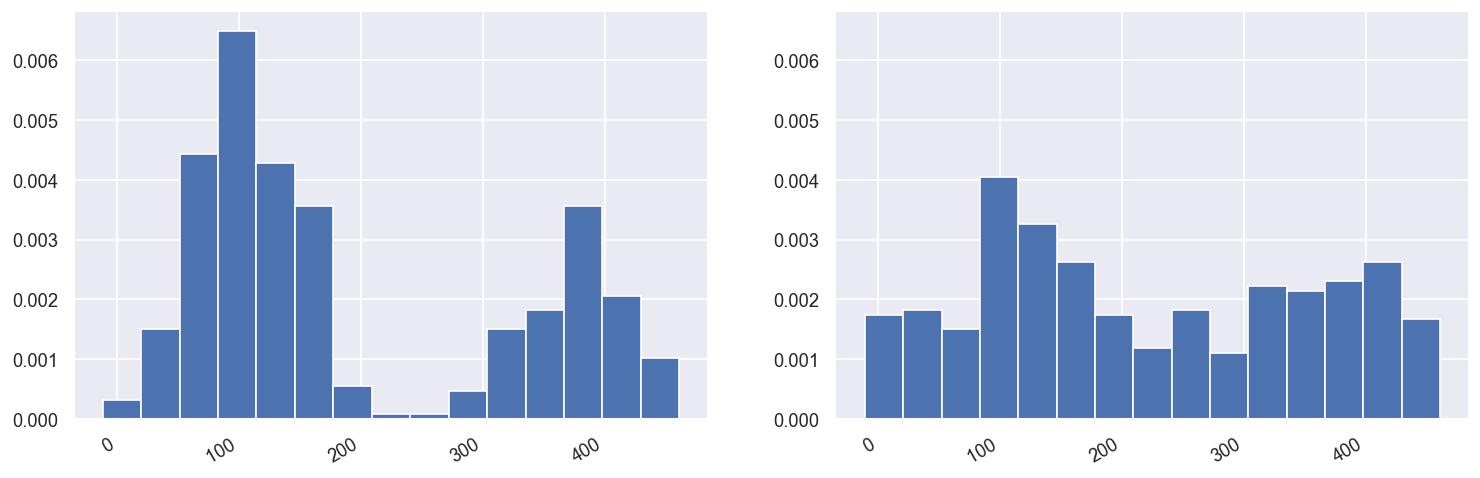

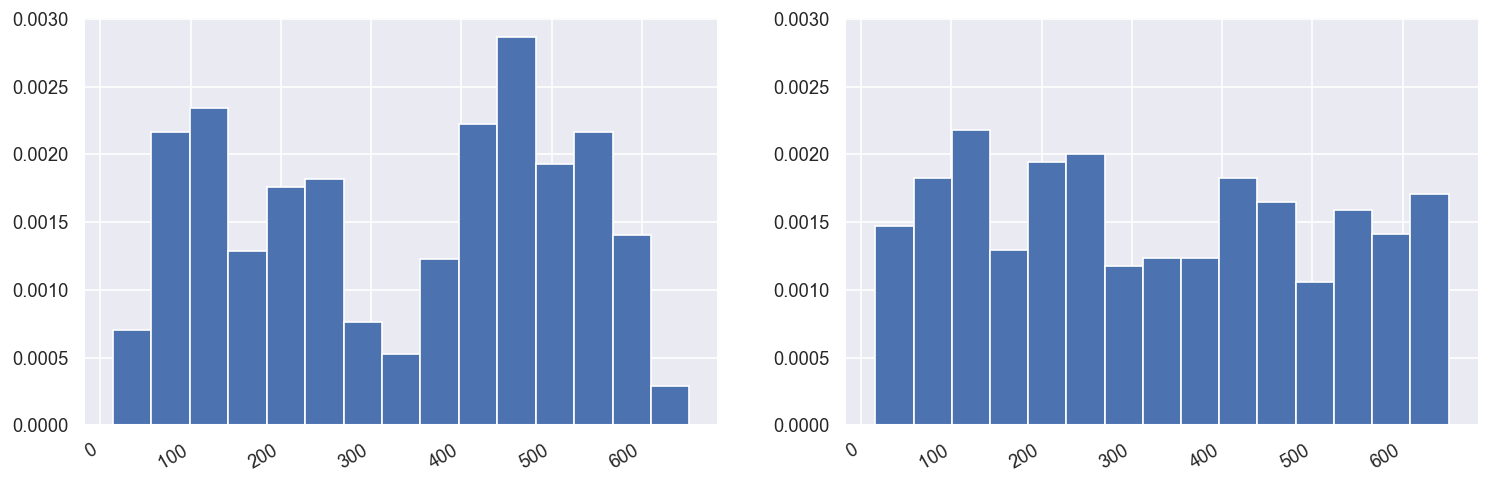

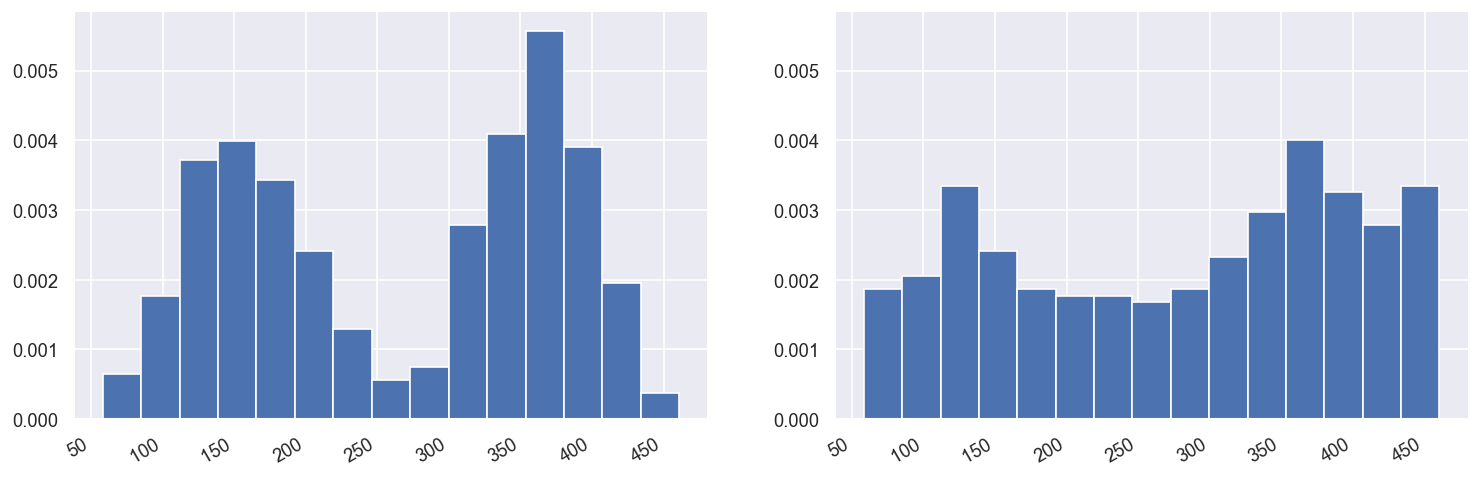

In [14]:
for attribute in synthetic_df.columns:
    print(attribute)
    inspector.compare_histograms(attribute)

### 5.3 compare pairwise mutual information

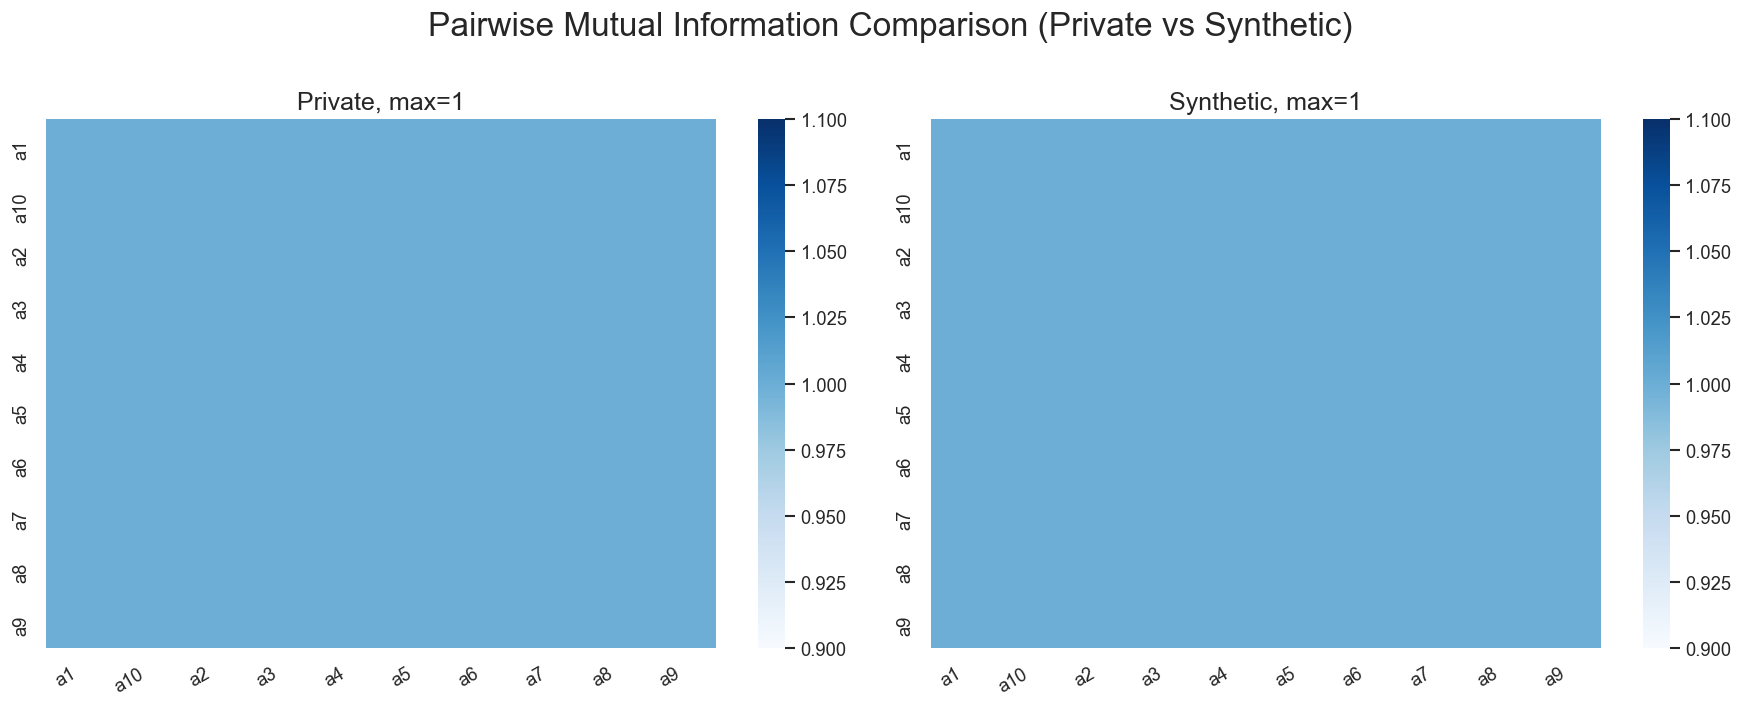

In [15]:
inspector.mutual_information_heatmap()

# 其他种类可视化的比较

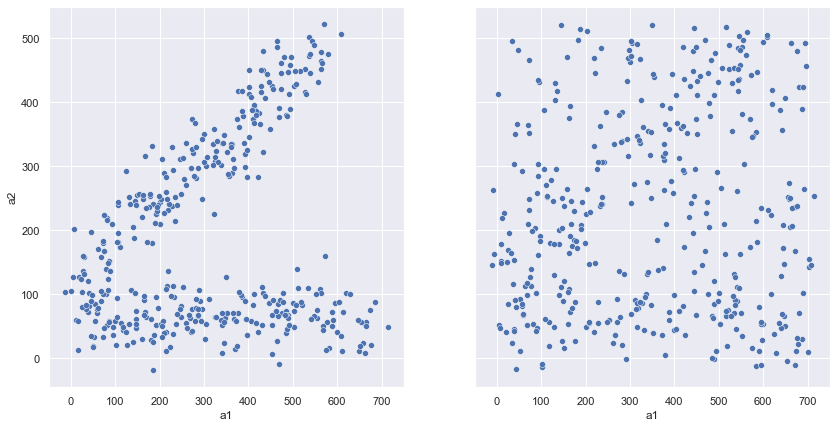

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 7))
ax = sns.scatterplot(data=input_df, x="a1", y="a2", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax1)
ax = sns.scatterplot(data=synthetic_df, x="a1", y="a2", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax2)

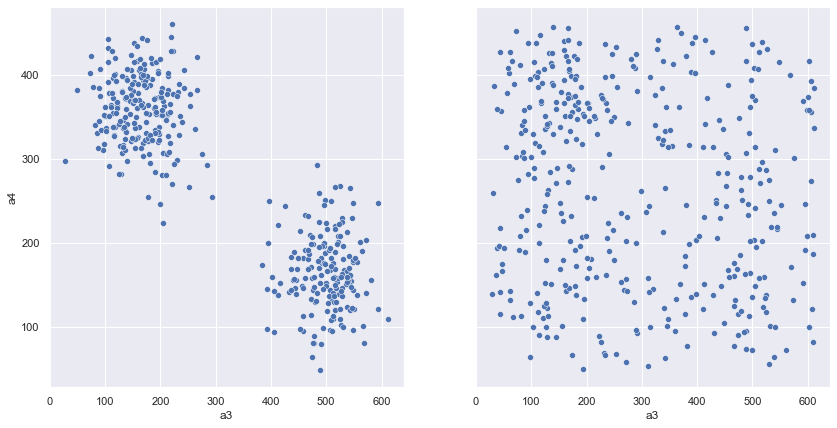

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 7))
ax = sns.scatterplot(data=input_df, x="a3", y="a4", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax1)
ax = sns.scatterplot(data=synthetic_df, x="a3", y="a4", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax2)

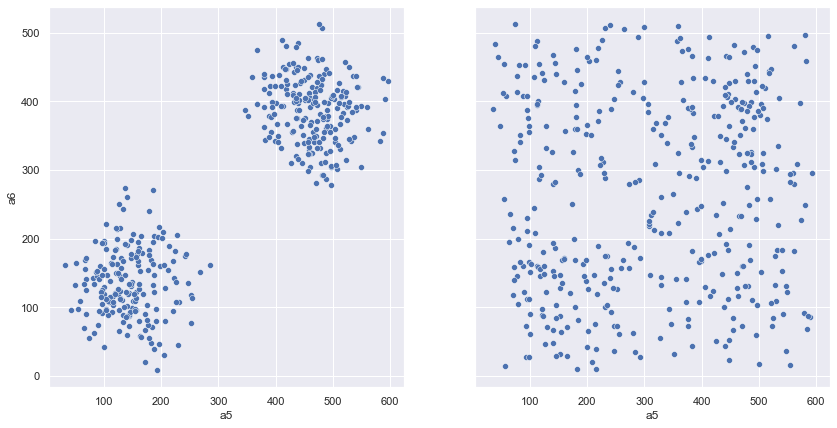

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 7))
ax = sns.scatterplot(data=input_df, x="a5", y="a6", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax1)
ax = sns.scatterplot(data=synthetic_df, x="a5", y="a6", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax2)

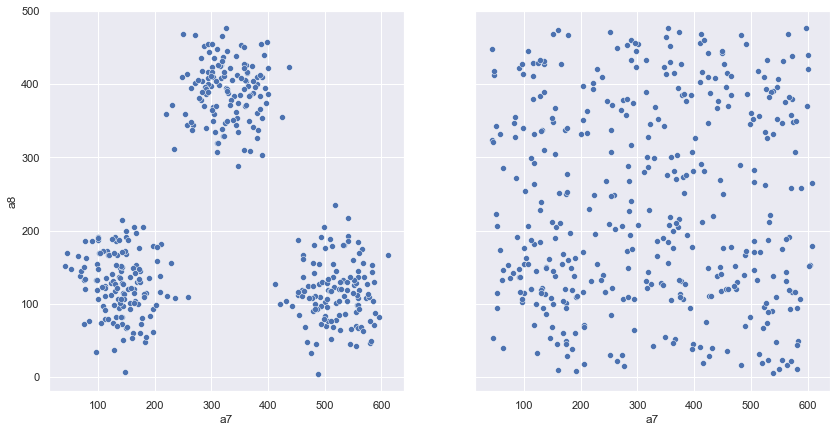

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 7))
ax = sns.scatterplot(data=input_df, x="a7", y="a8", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax1)
ax = sns.scatterplot(data=synthetic_df, x="a7", y="a8", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax2)

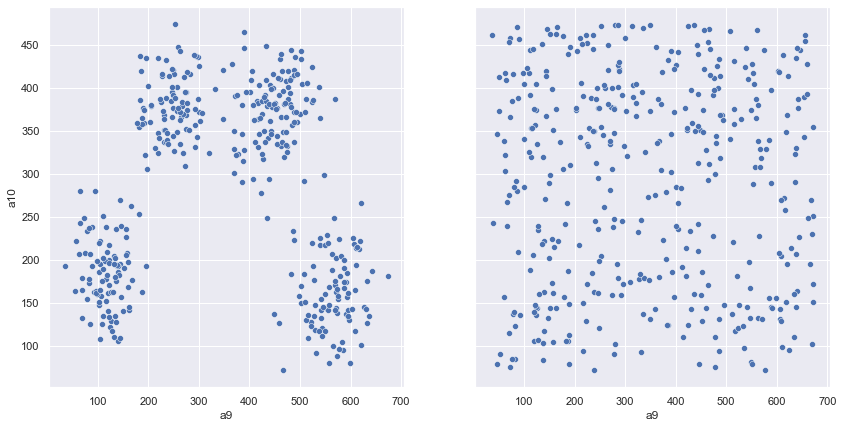

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 7))
ax = sns.scatterplot(data=input_df, x="a9", y="a10", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax1)
ax = sns.scatterplot(data=synthetic_df, x="a9", y="a10", palette=dict(a=sns.color_palette()[0], b=sns.color_palette()[1], c=sns.color_palette()[2], d=sns.color_palette()[3]), ax=ax2)